In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 1 prepare data

In [3]:
X_train, Y_train = datasets.make_circles(n_samples=500, noise=0.09, factor=0.4)
X_test, Y_test = datasets.make_circles(n_samples=200, noise=0.09, factor=0.4)

### - 1.1 Plot origin data

In [4]:
print('Training Data:')
print(X_train[:10])
print('\nTraining Label:')
print(Y_train[:10])

Training Data:
[[-1.0479456  -0.15193589]
 [ 0.00202277 -0.4745155 ]
 [-0.66518526 -0.88125556]
 [-0.15540387  0.83000145]
 [ 0.34690634 -0.14012244]
 [ 0.03964596 -0.38300768]
 [-0.13846332 -0.28026514]
 [-0.02008824  0.42452154]
 [-0.44235503 -0.8037406 ]
 [-0.14298356  0.49525987]]

Training Label:
[0 1 0 0 1 1 1 1 0 1]


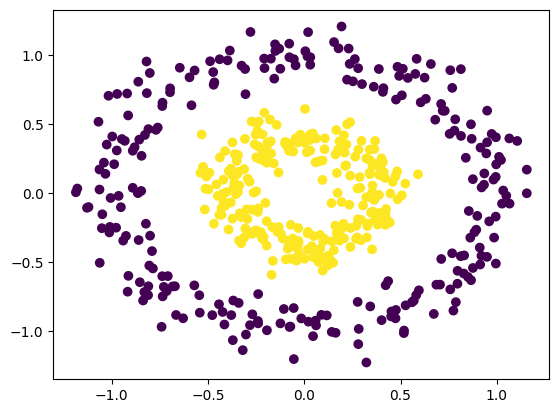

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.show()

In [6]:
print(f'Total datas: {len(X_train)}')
print(f'labels: {list(set(Y_train))}')
print(f' - label 0 datas: {len(list(filter(lambda x: x==0, Y_train)))}')
print(f' - label 1 datas: {len(list(filter(lambda x: x==1, Y_train)))}')

Total datas: 500
labels: [0, 1]
 - label 0 datas: 250
 - label 1 datas: 250


### - 1.2 Add new dimention datas

In [7]:
Z_train = (X_train[:, 0] ** 2 + X_train[:, 1] ** 2) ** 0.5
temp = np.zeros((X_train.shape[0], len(X_train[0]) + 1))
temp[:, :-1] = X_train
temp[:, -1] = Z_train
X_train2 = temp

Z_test = (X_test[:, 0] ** 2 + X_test[:, 1] ** 2) ** 0.5
temp = np.zeros((X_test.shape[0], len(X_test[0]) + 1))
temp[:, :-1] = X_test
temp[:, -1] = Z_test
X_test2 = temp

print('Solved Training Data:')
print(X_train2[:10])

Solved Training Data:
[[-1.0479456  -0.15193589  1.05890249]
 [ 0.00202277 -0.4745155   0.47451981]
 [-0.66518526 -0.88125556  1.10412082]
 [-0.15540387  0.83000145  0.84442452]
 [ 0.34690634 -0.14012244  0.37413675]
 [ 0.03964596 -0.38300768  0.38505413]
 [-0.13846332 -0.28026514  0.31260301]
 [-0.02008824  0.42452154  0.42499656]
 [-0.44235503 -0.8037406   0.91742952]
 [-0.14298356  0.49525987  0.51548679]]


### - 1.3 plot in 3D coordinate system

In [8]:
def plot3D(X, Y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        X[:, 0], X[:, 1], X[:, 2], 
        zdir='z', s=30, c=Y, depthshade=True
    )
    plt.show()

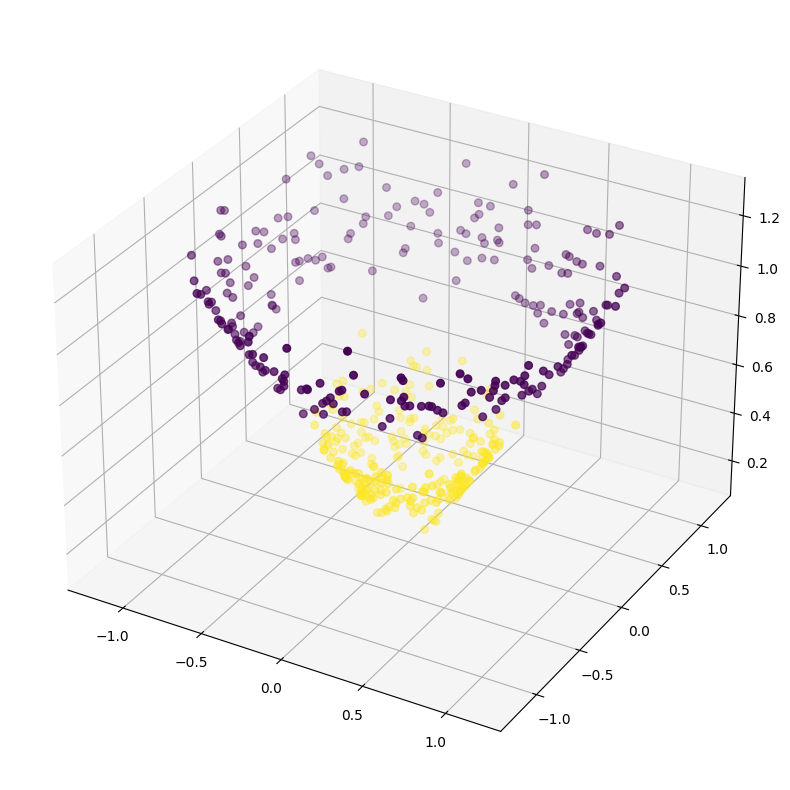

In [9]:
plot3D(X_train2, Y_train)

### - 1.4 load iris data

In [10]:
X, Y = datasets.load_iris(return_X_y=True)

X_train_0 = X[0:30]
X_train_1 = X[50:80]
X_train_iris = np.vstack((X_train_0, X_train_1))

Y_train_0 = Y[0:30]
Y_train_1 = Y[50:80]
Y_train_iris = np.vstack((Y_train_0, Y_train_1)).flatten()

X, Y = datasets.load_iris(return_X_y=True)

X_test_0 = X[30:50]
X_test_1 = X[80:100]
X_test_iris = np.vstack((X_test_0, X_test_1))

Y_test_0 = Y[30:50]
Y_test_1 = Y[80:100]
Y_test_iris = np.vstack((Y_test_0, Y_test_1)).flatten()

In [11]:
X_train_iris = (X_train_iris - X_train_iris.min(axis=0)) / (X_train_iris.max(axis=0) - X_train_iris.min(axis=0))
X_test_iris = (X_test_iris - X_test_iris.min(axis=0)) / (X_test_iris.max(axis=0) - X_test_iris.min(axis=0))

## Step 2 Initialize Quantum Circuit

In [12]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, execute

qasm_backend = Aer.get_backend('qasm_simulator')

In [13]:
params = [
    [[-1.18991246e-01, -8.69694713e-01,  1.43722811e-03],
      [ 3.47641545e+00, -4.73632073e-02,  1.97135609e+00],
      [ 1.95775707e+00, -1.12139160e-02, -6.21796144e-03]],

     [[ 2.02460380e-02, -2.25797547e+00,  5.14234265e-03],
      [-1.71552299e-02,  2.46283604e-03, -1.03805722e-02],
      [-2.37244982e-03, -3.35799404e-03,  6.10191152e-03]]
]

params_iris = [
    [[-3.42142600e-02, -5.45047534e-03,  8.11905347e-01],
     [-1.52484152e+00,  1.49884676e+00, -1.25408626e-02],
     [-1.89515860e-03,  1.35760410e-02,  8.22999582e-03],
     [ 1.39102114e+00,  4.19729865e-01,  1.60000380e-04]],

    [[ 7.88431068e-01, -8.86177264e-01,  1.33830291e-02],
     [-3.71228143e-03, -1.12994101e-02, -1.27897783e-02],
     [ 9.45954683e-03, -3.34659883e-03,  1.17217829e-02],
     [ 1.98256181e-02, -1.07358054e-02,  7.53621360e-03]]
]

### - 2.1 create quantum circuit

In [14]:
def createInputCircuit(data):
    qubits_num = len(data)
    qcircuit = QuantumCircuit(qubits_num, qubits_num)
    qubits = qcircuit.qubits

    for i, d in enumerate(data):
        qcircuit.rx(d * np.pi, qubits[i])
        
    return qcircuit

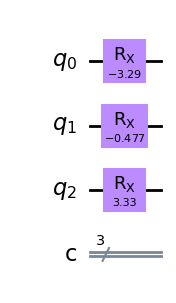

In [15]:
# Test 1: create input circuit

test1_circuit = createInputCircuit(X_train2[0])
test1_circuit.draw(output='mpl')

In [16]:
def createModelCircuit(params):
    qubits_num = len(params[0])
    qcircuit = QuantumCircuit(qubits_num, qubits_num)
    qubits = qcircuit.qubits

    for i in range(qubits_num):
        qcircuit.u3(*params[0][i], qubits[i])

    for i in range(qubits_num - 1):
        qcircuit.cz(qubits[i], qubits[i + 1])
    qcircuit.cz(qubits[0], qubits[qubits_num - 1])

    for i in range(qubits_num):
        qcircuit.u3(*params[1][i], qubits[i])
        
    return qcircuit

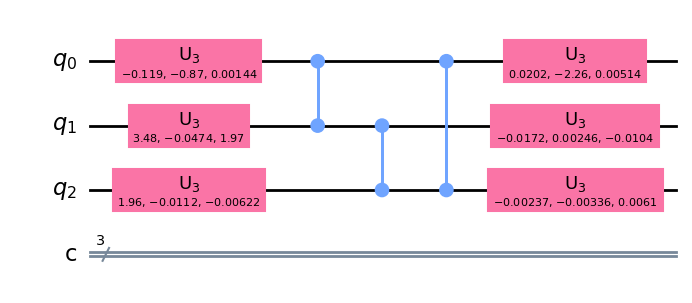

In [17]:
# Test 2: create model circuit

test2_circuit = createModelCircuit(params)
test2_circuit.draw(output='mpl')

In [18]:
def createCircuit(params, data):
    input_circuit = createInputCircuit(data)
    model_circuit = createModelCircuit(params)
    full_circuit = input_circuit.compose(model_circuit)
    
    return full_circuit

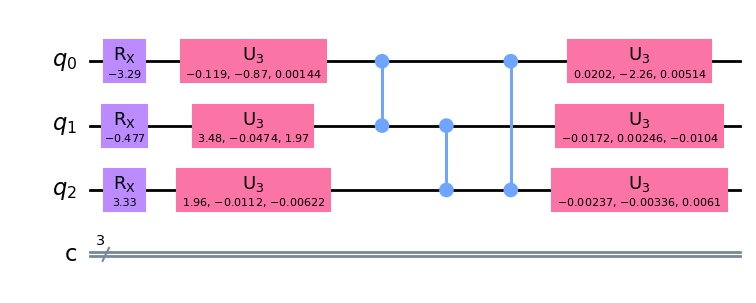

In [19]:
# Test 3-1: create full quantum circuit - circle

test3_circuit = createCircuit(params, X_train2[0])
test3_circuit.draw(output='mpl')

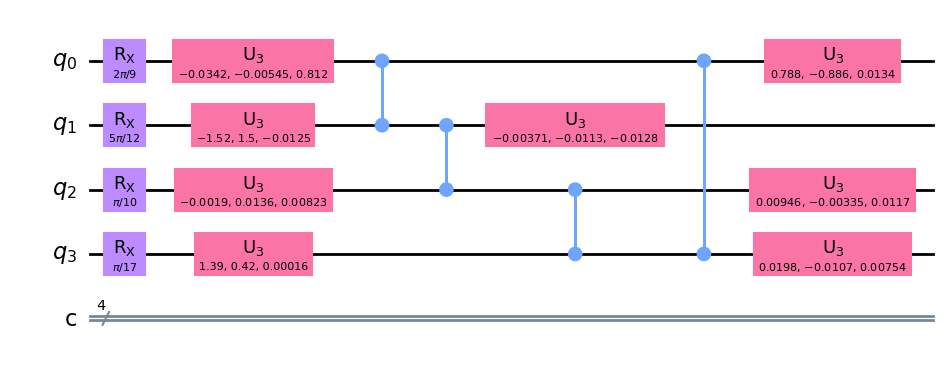

In [20]:
# Test 3-2: create full quantum circuit - iris

test3_circuit = createCircuit(params_iris, X_train_iris[1])
test3_circuit.draw(output='mpl')

### - 2.2 evaluate

In [21]:
def predict(model, data):
    qubits_num = len(data)
    input_circuit = createInputCircuit(data)
    qcircuit = input_circuit.compose(model)
    
    # the measurement
    qcircuit.measure(list(range(qubits_num)), list(range(qubits_num)))

    # job execution
    shots = 1000
    job_sim = execute(qcircuit, qasm_backend, shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qcircuit)

    p1 = 0
    for i in range(2 ** (qubits_num - 1)):
        comb = str(bin(i + 2 ** (qubits_num - 1))[2:])
        p1 += counts.get(comb, 0)
        
    p1 /= shots
    
    if p1 > 0.5:
        return 1
    else:
        return 0

In [22]:
def accuracy(model, datas, labels):
    predictions = [ predict(model, data) for data in datas ]
    
    acc = 0
    for i, p in enumerate(predictions):
        if p == labels[i]:
            acc += 1
    
    return acc / len(predictions)

In [23]:
def evaluate(model, X_test, Y_test):
    acc = accuracy(model, X_test, Y_test)

    print("FINAL ACCURACY: {:0.2f}%".format(acc * 100))

In [24]:
# Test 4: evaluate noiseless model

test4_circuit = createModelCircuit(params_iris)

evaluate(test4_circuit, X_train_iris, Y_train_iris)
evaluate(test4_circuit, X_test_iris, Y_test_iris)

FINAL ACCURACY: 98.33%
FINAL ACCURACY: 100.00%


## Step 3 Create Noisy Circuit

In [25]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.utils import insert_noise
from qiskit.providers.aer.noise import pauli_error, depolarizing_error

In [26]:
def createNoiseModel(p, errorType):
    # QuantumError objects
    if errorType == 'bit_flip':
        error = pauli_error([('X', p), ('I', 1 - p)])
    elif errorType == 'phase_flip':
        error = pauli_error([('Z', p), ('I', 1 - p)])
    elif errorType == 'depolarizing':
        error = depolarizing_error(p, num_qubits=1)
        
    ## two-qubits quantumError objects 
    if errorType == 'depolarizing':
        error_2qubits = depolarizing_error(p, num_qubits=2)
    else:
        error_2qubits = error.tensor(error)
        
    # Add errors to noise model
    noise_model = NoiseModel()
    
    noise_model.add_all_qubit_quantum_error(error, ['u3'])
    noise_model.add_all_qubit_quantum_error(error_2qubits, ['cz'])
    
    return noise_model

In [27]:
def createNoisyModelCircuit(params, p, errorType):
    noise_model = createNoiseModel(p, errorType)
    model_circuit = createModelCircuit(params)
    
    return insert_noise(model_circuit, noise_model)

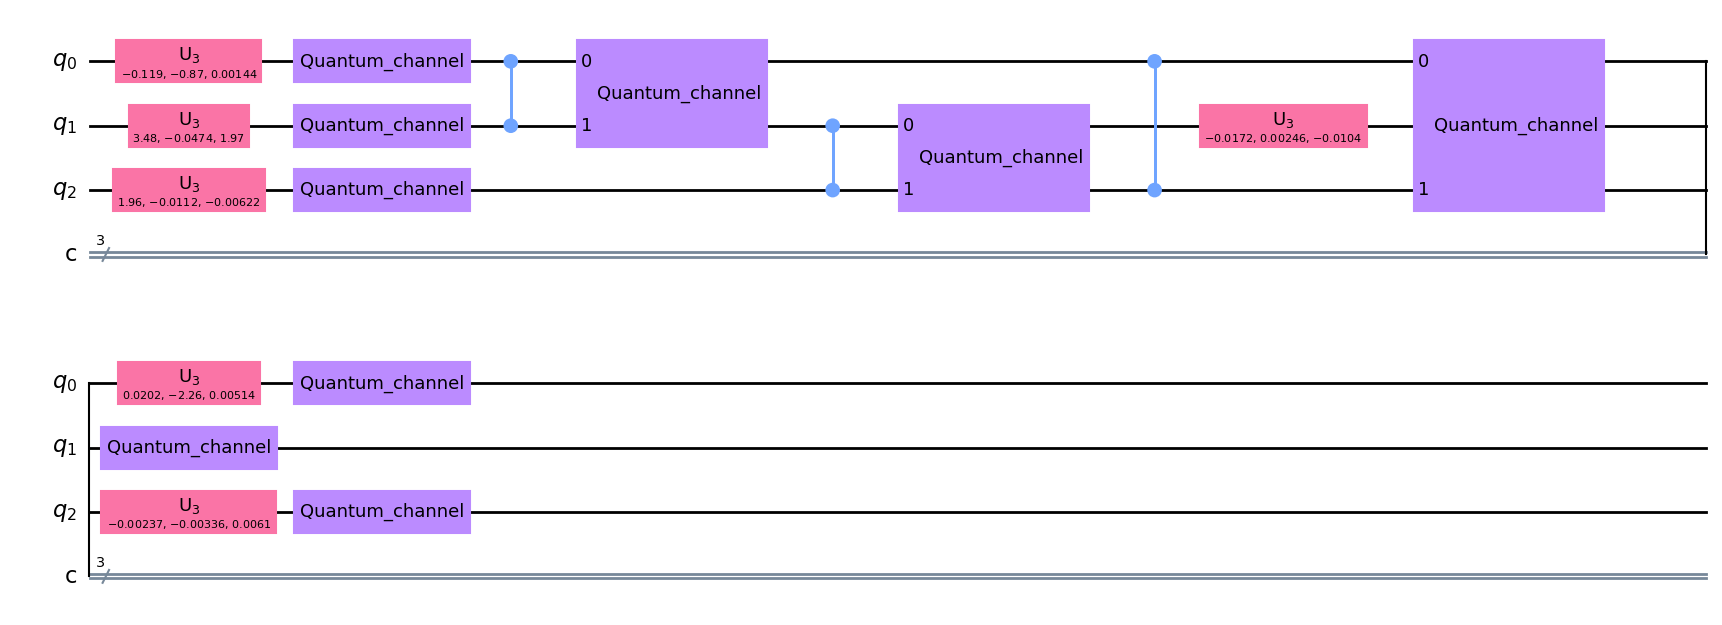

In [28]:
# Test 5-1: create noisy model circuit - circle

test5_p = 0.001
test5_circuit = createNoisyModelCircuit(params, test5_p, 'phase_flip')
test5_circuit.draw(output='mpl')

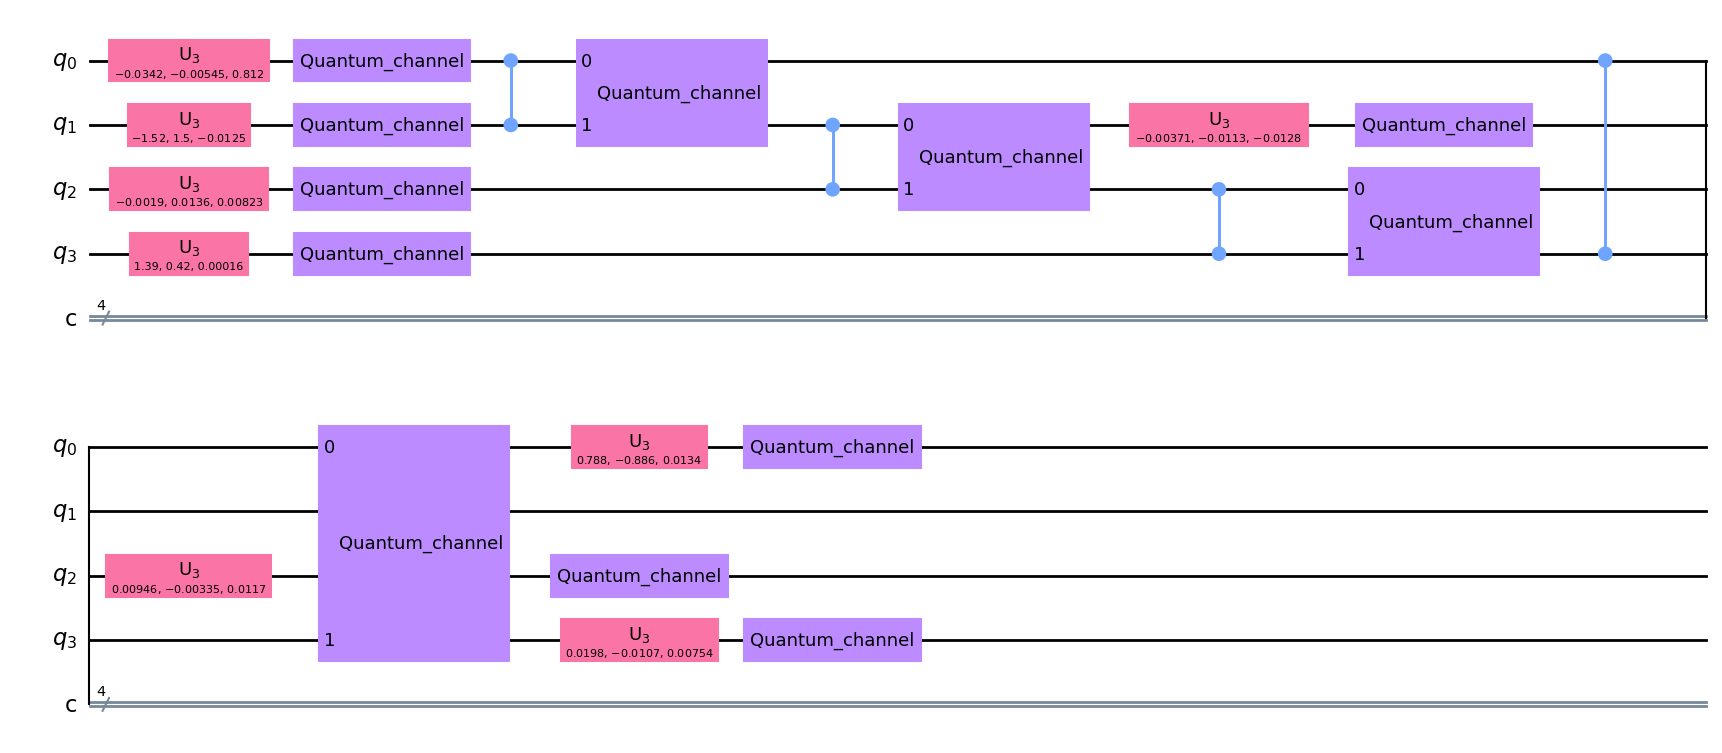

In [29]:
# Test 5-2: create noisy model circuit - iris

test5_p = 0.001
test5_circuit = createNoisyModelCircuit(params_iris, test5_p, 'bit_flip')
test5_circuit.draw(output='mpl')

In [30]:
# Test 6-1: evaluate noisy model - circle

test6_p = 0.001
models_type = [
    'noiseless', 'bit_flip', 'phase_flip', 'depolarizing'
]
test6_circuits = [
    createModelCircuit(params),
    createNoisyModelCircuit(params, test6_p, 'bit_flip'),
    createNoisyModelCircuit(params, test6_p, 'phase_flip'),
    createNoisyModelCircuit(params, test6_p, 'depolarizing')
]

for i, model_type in enumerate(models_type):
    print(f'Evaluate <{model_type}>: ')
    evaluate(test6_circuits[i], X_test2, Y_test)
    print()

Evaluate <noiseless>: 
FINAL ACCURACY: 88.50%

Evaluate <bit_flip>: 
FINAL ACCURACY: 89.50%

Evaluate <phase_flip>: 
FINAL ACCURACY: 90.00%

Evaluate <depolarizing>: 
FINAL ACCURACY: 89.50%



In [31]:
# Test 6-2: evaluate noisy model - iris

test6_p = 0.5
models_type = [
    'noiseless', 'bit_flip', 'phase_flip', 'depolarizing'
]
test6_circuits = [
    createModelCircuit(params_iris),
    createNoisyModelCircuit(params_iris, test6_p, 'bit_flip'),
    createNoisyModelCircuit(params_iris, test6_p, 'phase_flip'),
    createNoisyModelCircuit(params_iris, test6_p, 'depolarizing')
]

for i, model_type in enumerate(models_type):
    print(f'Evaluate <{model_type}>: ')
    evaluate(test6_circuits[i], X_test_iris, Y_test_iris)
    print()

Evaluate <noiseless>: 
FINAL ACCURACY: 100.00%

Evaluate <bit_flip>: 
FINAL ACCURACY: 62.50%

Evaluate <phase_flip>: 
FINAL ACCURACY: 100.00%

Evaluate <depolarizing>: 
FINAL ACCURACY: 60.00%



## Step 4 Algorithm Objects

In [32]:
from functools import reduce

Dag = lambda matrix: matrix.conj().T
Kron = lambda *matrices: reduce(np.kron, matrices)

### - 4.1 get density matrix/statevector from circuit

In [33]:
from qiskit.quantum_info import DensityMatrix, Statevector

def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

def getStatevector(circuit):
    return Statevector(circuit).data

### - 4.2 Measurements

In [34]:
psi_0 = np.array([1.0, 0.0])
psi_1 = np.array([0.0, 1.0])
I = np.eye(2)

M_0 = psi_0.reshape([2, 1]) @ psi_0.reshape([1, 2]).conj()
M_1 = psi_1.reshape([2, 1]) @ psi_1.reshape([1, 2]).conj()

In [35]:
def getMeasurements(qubits_num):
    measurement_0 = [M_0]
    measurement_1 = [M_1]
    
    for i in range(qubits_num - 1):
        measurement_0.append(I)
        measurement_1.append(I)
        
    return [
        Kron(*measurement_0),
        Kron(*measurement_1)
    ]

In [36]:
# Test 7: test measure

test7_M_0, test7_M_1 = getMeasurements(qubits_num=3)

# 2: |0> - X -
test7_1_circuit = QuantumCircuit(3, 3)
test7_1_circuit.x(test7_1_circuit.qubits[2])
test7_1_circuit.draw(output='mpl')

test7_1_density_matrix = getDensityMatrix(test7_1_circuit)

test7_1_p1 = np.trace( test7_M_1 @ test7_1_density_matrix @ Dag(test7_M_1) )
print(test7_1_p1) # should be 1

# 2: |0> - H -
test7_2_circuit = QuantumCircuit(3, 3)
test7_2_circuit.h(test7_2_circuit.qubits[2])
test7_2_circuit.draw(output='mpl')

test7_2_density_matrix = getDensityMatrix(test7_2_circuit)
test7_2_p1 = np.trace( test7_M_1 @ test7_2_density_matrix @ Dag(test7_M_1) )
print(test7_2_p1) # should be 0.5

test7_M_0, test7_M_1 = getMeasurements(qubits_num=4)

# 3: |0> - H -
test7_3_circuit = QuantumCircuit(4, 4)
test7_3_circuit.h(test7_3_circuit.qubits[3])
test7_3_circuit.draw(output='mpl')

test7_3_density_matrix = getDensityMatrix(test7_3_circuit)

test7_3_p1 = np.trace( test7_M_1 @ test7_3_density_matrix @ Dag(test7_M_1) )
print(test7_3_p1) # should be 0.5

(1+0j)
(0.4999999999999999+0j)
(0.4999999999999999+0j)


### - 4.3 power sets

In [37]:
def powerSets(items):
    N = len(items)
    combs = []
    
    for i in range(2 ** N):
        comb = []
        for j in range(N):
            if (i >> j) % 2:
                comb.append(items[j])
        combs.append(comb)
    
    return combs 

In [38]:
# Test 8: calculate power sets

print(powerSets([0, 1]))

[[], [0], [1], [0, 1]]


### - 4.4 algorithm class

In [39]:
class Algorithm:
    def __init__(self, model_circuit, measurements, outputs):
        # DensityMatrix of model
        self.E = getDensityMatrix(model_circuit)
        
        # Measurements
        self.M = dict()
        for index, output in enumerate(outputs):
            self.M[output] = measurements[index]
        
        # Outputs
        self.O = outputs
        self.O_ = powerSets(outputs)

In [40]:
# Test 9: algorithm objects

test9_circuit = createModelCircuit(params_iris)
test9_A = Algorithm(test9_circuit, getMeasurements(qubits_num=4), [0, 1])

print(test9_A.E.shape)
print(test9_A.O)
print(test9_A.O_)

(16, 16)
[0, 1]
[[], [0], [1], [0, 1]]


## Step 5 Distance Calculation

### - 5.1 trace distance

In [41]:
from scipy.linalg import sqrtm

def D(rou, sigma):
    A = rou - sigma
    A_ = sqrtm( np.dot( A.conj().T, A ) )

    return 0.5 * np.linalg.norm( np.trace(A_) )

In [42]:
# Test 10: trace distance example

from math import isclose

# example from: quantumnanophotonics.org/media/Module2Lecture8.pdf
test10_rou = np.array([[2.0, 0.0], [0.0, 1.0]]) / 3
test10_sigma = np.array([[3.0, 0.0], [0.0, 1.0]]) / 4

assert isclose(D(test10_rou, test10_sigma), 1/12)

In [43]:
# Test 11: calculate input states' distance

test11_rou = getDensityMatrix(createInputCircuit(X_train2[0]))
test11_sigma = getDensityMatrix(createInputCircuit(X_train2[1]))

print(D(test11_rou, test11_rou)) # should be 0
print(D(test11_rou, test11_sigma))

0.0
0.9991324663029832


### - 5.2 total variation distance

In [44]:
def d(A, rou, sigma):
    distance = 0
    
    for output in A.O:
        trace = np.trace(
            Dag(A.M[output]) @ A.M[output] @ 
            (A.E @ (rou - sigma) @ Dag(A.E))
        )
        
        distance += np.linalg.norm(trace)
    
    return distance / 2

In [45]:
# Test 12: calculate total variation distance

test12_circuit = createModelCircuit(params)
test12_A = Algorithm(test12_circuit, getMeasurements(qubits_num=3), [0, 1])

test12_rou = getDensityMatrix(createInputCircuit(X_train2[0]))
test12_sigma = getDensityMatrix(createInputCircuit(X_train2[1]))

print(d(test12_A, test12_rou, test12_rou))
print(d(test12_A, test12_rou, test12_sigma))

0.0
0.14724516131436494


## Step 6 Calculate Lipschitz constant

### - 6.1 calculate lipschitz constant

In [46]:
def Lipschitz(A):
    E, M, O, O_ = A.E, A.M, A.O, A.O_
    
    # Step 1: Calculate W_i
    W = dict()
    for i in O:
        W[i] = Dag(E) @ Dag(M[i]) @ M[i] @ E
    
    # Step 2: Calculate K_star
    K_star = 0; vectors = [None, None]
    M_star = np.zeros(E.shape)
    
    for S in O_:
        if len(S) == 0:
            continue
            
        # calculate M_S = Σ Wi
        M_S = np.zeros(E.shape).astype('complex64')
        for i in S:
            M_S += W[i]
        
        # calculate eigenvalues and eigenvectors of M_S
        eigenvalues, eigenvectors = np.linalg.eigh(M_S)
        min_index = np.where(eigenvalues == eigenvalues.min())
        max_index = np.where(eigenvalues == eigenvalues.max())
        
        # calculate K_S
        K_S = np.linalg.norm(eigenvalues[max_index][0] - eigenvalues[min_index][0])
        
        if K_S > K_star:
            K_star = K_S
            vectors[0] = eigenvectors.T[max_index][0]
            vectors[1] = eigenvectors.T[min_index][0]
            
    return K_star, np.array(vectors)

In [47]:
# Test 13: calculate lipschitz constant

print('Classifier for centric circle: ')
test13_1_circuit = createModelCircuit(params)
test13_1_A = Algorithm(test13_1_circuit, getMeasurements(qubits_num=3), [0, 1])
print(Lipschitz(test13_1_A))

print('\nClassifier for Iris: ')
test13_2_circuit = createModelCircuit(params_iris)
test13_2_A = Algorithm(test13_2_circuit, getMeasurements(qubits_num=4), [0, 1])
print(Lipschitz(test13_2_A))

Classifier for centric circle: 
(1.0, array([[ 0.08830713+0.j        ,  0.0052315 -0.00061151j,
        -0.54784316+0.03141748j,  0.03646262+0.00281407j,
         0.14485073-0.00194239j, -0.00875763-0.001208j  ,
         0.8147165 -0.05454154j,  0.04297415-0.00832087j],
       [ 0.5483868 +0.j        ,  0.03865225+0.00100061j,
        -0.13613315+0.11122154j,  0.00441891+0.13853304j,
        -0.7345542 +0.26197848j, -0.09349396+0.03739827j,
        -0.03322783+0.0185454j ,  0.1658317 +0.01931279j]],
      dtype=complex64))

Classifier for Iris: 
(1.0, array([[ 5.1224810e-01+0.0000000e+00j,  1.2805447e-01-1.5716428e-01j,
        -4.6464182e-02-4.8011953e-01j, -1.7507088e-01-1.1697307e-01j,
         1.9302657e-03-2.3970471e-05j,  4.7483321e-04-5.9813249e-04j,
        -2.5687154e-04-2.7331561e-03j, -9.9440350e-04-6.6813920e-04j,
         3.9289543e-01+1.7302768e-01j,  1.6676332e-01-8.4787413e-02j,
         1.3040526e-01-3.9493093e-01j, -8.8753097e-02-1.3898401e-01j,
         2.2194656e-03

In [48]:
# Test 14-1: calculate lipschitz constant in noisy model

test14_p = [0.0001, 0.001, 0.05, 0.1]
models_type = [
    'noiseless', 'bit_flip', 'phase_flip', 'depolarizing'
]

print('Classifier for centric circle: ')
for p in test14_p:
    test14_1_circuits = [
        createModelCircuit(params),
        createNoisyModelCircuit(params, p, 'bit_flip'),
        createNoisyModelCircuit(params, p, 'phase_flip'),
        createNoisyModelCircuit(params, p, 'depolarizing')
    ]
    
    print(f'p: {p}')
    for i, model_type in enumerate(models_type):
        test14_1_noisy_A = Algorithm(test14_1_circuits[i], getMeasurements(qubits_num=3), [0, 1])
        print(f'{model_type} model: {Lipschitz(test14_1_noisy_A)[0]}')
    print()

Classifier for centric circle: 
p: 0.0001
noiseless model: 1.0
bit_flip model: 0.9982796311378479
phase_flip model: 0.9992163777351379
depolarizing model: 0.9989377856254578

p: 0.001
noiseless model: 1.0
bit_flip model: 0.9829362034797668
phase_flip model: 0.9922083020210266
depolarizing model: 0.9894289970397949

p: 0.05
noiseless model: 1.0
bit_flip model: 0.43096035718917847
phase_flip model: 0.709731936454773
depolarizing model: 0.5891456604003906

p: 0.1
noiseless model: 1.0
bit_flip model: 0.19194786250591278
phase_flip model: 0.5588558912277222
depolarizing model: 0.35014522075653076



In [49]:
# Test 14-2: calculate lipschitz constant in noisy model

test14_p = [0.0001, 0.001, 0.05, 0.1]
models_type = [
    'noiseless', 'bit_flip', 'phase_flip', 'depolarizing'
]

print('Classifier for Iris: ')
for p in test14_p:
    test14_2_circuits = [
        createModelCircuit(params_iris),
        createNoisyModelCircuit(params_iris, p, 'bit_flip'),
        createNoisyModelCircuit(params_iris, p, 'phase_flip'),
        createNoisyModelCircuit(params_iris, p, 'depolarizing')
    ]
    
    print(f'p: {p}')
    for i, model_type in enumerate(models_type):
        test14_2_noisy_A = Algorithm(test14_2_circuits[i], getMeasurements(qubits_num=4), [0, 1])
        print(f'{model_type} model: {Lipschitz(test14_2_noisy_A)[0]}')
    print()

Classifier for Iris: 
p: 0.0001
noiseless model: 1.0
bit_flip model: 0.9974957704544067
phase_flip model: 0.9983262419700623
depolarizing model: 0.9986007213592529

p: 0.001
noiseless model: 1.0
bit_flip model: 0.975249707698822
phase_flip model: 0.9834035038948059
depolarizing model: 0.9860955476760864

p: 0.05
noiseless model: 1.0
bit_flip model: 0.29632073640823364
phase_flip model: 0.4548749029636383
depolarizing model: 0.4973519444465637

p: 0.1
noiseless model: 1.0
bit_flip model: 0.09604907780885696
phase_flip model: 0.23411400616168976
depolarizing model: 0.249342143535614



### - 6.2 Fairness verifying

In [50]:
def FairVeriQ(A, epsilon, delta):
    # epsilon <= 1 and delta > 0
    K_star, kernel = Lipschitz(A)
    
    if delta >= K_star * epsilon:
        return True, None
    else:
        return False, kernel

In [51]:
# Test 15-1: find proper epsilon - circle

import random

# D(rou, sigma) <= epsilon
indices = []
while len(indices) < 50:
    a = random.randint(0, len(X_train2) - 1)
    b = random.randint(0, len(X_train2) - 1)
    if a != b:
        indices.append([a, b])

distances = []
for pair in indices:
    rou = getDensityMatrix(createInputCircuit(X_train2[pair[0]]))
    sigma = getDensityMatrix(createInputCircuit(X_train2[pair[1]]))
    
    distances.append(D(rou, sigma))
    
print('find proper epsilon - centric circle')
print(f'Mean distance: {sum(distances) / len(distances)}')
print(f'Max distance: {max(distances)}')
print(f'Min distance: {min(distances)}')

find proper epsilon - centric circle
Mean distance: 0.8015871518061924
Max distance: 0.9999996127156026
Min distance: 0.19951183226870292


In [52]:
# Test 15-2: find proper epsilon - iris

# D(rou, sigma) <= epsilon
indices = []
while len(indices) < 50:
    a = random.randint(0, len(X_train_iris) - 1)
    b = random.randint(0, len(X_train_iris) - 1)
    if a != b:
        indices.append([a, b])

distances = []
for pair in indices:
    rou = getDensityMatrix(createInputCircuit(X_train_iris[pair[0]]))
    sigma = getDensityMatrix(createInputCircuit(X_train_iris[pair[1]]))
    
    distances.append(D(rou, sigma))

print('find proper epsilon - centric iris')
print(f'Mean distance: {sum(distances) / len(distances)}')
print(f'Max distance: {max(distances)}')
print(f'Min distance: {min(distances)}')

find proper epsilon - centric iris
Mean distance: 0.7648498873789216
Max distance: 0.9999596813114654
Min distance: 0.11293627887720475


In [53]:
# Test 16-1: find proper delta - circle

test16_1_circuit = createModelCircuit(params)
test16_1_A = Algorithm(test16_1_circuit, getMeasurements(qubits_num=3), [0, 1])

# d(A(rou), A(sigma)) <= delta
indices = []
while len(indices) < 50:
    a = random.randint(0, len(X_train2) - 1)
    b = random.randint(0, len(X_train2) - 1)
    if a != b:
        indices.append([a, b])

distances = []
for pair in indices:
    rou = getDensityMatrix(createInputCircuit(X_train2[pair[0]]))
    sigma = getDensityMatrix(createInputCircuit(X_train2[pair[1]]))
    
    distances.append(d(test16_1_A, rou, sigma))

print('find proper delta - circle')
print(f'Mean distance: {sum(distances) / len(distances)}')
print(f'Max distance: {max(distances)}')
print(f'Min distance: {min(distances)}')

find proper delta - circle
Mean distance: 0.0617588018773251
Max distance: 0.2668696054715782
Min distance: 4.443084240540264e-05


In [54]:
# Test 16-2: find proper delta - iris

test16_2_circuit = createModelCircuit(params_iris)
test16_2_A = Algorithm(test16_2_circuit, getMeasurements(qubits_num=4), [0, 1])

# d(A(rou), A(sigma)) <= delta
indices = []
while len(indices) < 50:
    a = random.randint(0, len(X_train_iris) - 1)
    b = random.randint(0, len(X_train_iris) - 1)
    if a != b:
        indices.append([a, b])

distances = []
for pair in indices:
    rou = getDensityMatrix(createInputCircuit(X_train_iris[pair[0]]))
    sigma = getDensityMatrix(createInputCircuit(X_train_iris[pair[1]]))
    
    distances.append(d(test16_2_A, rou, sigma))

print('find proper delta - iris')
print(f'Mean distance: {sum(distances) / len(distances)}')
print(f'Max distance: {max(distances)}')
print(f'Min distance: {min(distances)}')

find proper delta - iris
Mean distance: 0.09494891366564139
Max distance: 0.26286960081164606
Min distance: 0.000792585408952696


In [55]:
# Test 17-1: fairness verifying - circle

test17_1_circuit = createNoisyModelCircuit(params, p=0.001, errorType='bit_flip')
test17_1_A = Algorithm(test17_1_circuit, getMeasurements(qubits_num=3), [0, 1])

print(f'Lipschitz constant: {Lipschitz(test17_1_A)[0]}\n')

test17_1_fairness_params = [
    # epsilon, delta
    [1, 1], [0.9, 0.89], [0.6, 0.58], [0.6, 0.59]
]

for epsilon, delta in test17_1_fairness_params:
    flag, kernel = FairVeriQ(test17_1_A, epsilon, delta)
    
    print(f'A is ({epsilon},{delta})-fair: <{flag}>')
    if not flag:
        print(f' - bias kernel pair is: {kernel}')
    print()

Lipschitz constant: 0.9829362034797668

A is (1,1)-fair: <True>

A is (0.9,0.89)-fair: <True>

A is (0.6,0.58)-fair: <False>
 - bias kernel pair is: [[ 8.7966137e-02+0.j          5.2421880e-03-0.00060624j
  -5.4890203e-01+0.03147535j  3.6392592e-02+0.00287853j
   1.4496601e-01-0.00197145j -8.7222224e-03-0.00120635j
   8.1403214e-01-0.05442044j  4.2936157e-02-0.00820159j]
 [ 5.2705202e-02+0.j          8.3077484e-01+0.12186631j
   5.6519429e-04-0.00089926j  1.2709215e-01+0.01143511j
  -2.9756736e-02-0.00739511j  5.1050264e-01+0.07122577j
  -3.7684434e-04+0.00077956j -9.5929116e-02-0.0083804j ]]

A is (0.6,0.59)-fair: <True>



In [56]:
# Test 17-2: fairness verifying - iris

test17_2_circuit = createNoisyModelCircuit(params_iris, p=0.001, errorType='phase_flip')
test17_2_A = Algorithm(test17_2_circuit, getMeasurements(qubits_num=4), [0, 1])

print(f'Lipschitz constant: {Lipschitz(test17_2_A)[0]}\n')

test17_2_fairness_params = [
    # epsilon, delta
    [1, 0.99], [0.8, 0.79], [0.5, 0.3]
]

for epsilon, delta in test17_2_fairness_params:
    flag, kernel = FairVeriQ(test17_2_A, epsilon, delta)
    
    print(f'A is ({epsilon},{delta})-fair: <{flag}>')
    if not flag:
        print(f' - bias kernel pair is: {kernel}')
    print()

Lipschitz constant: 0.9834035038948059

A is (1,0.99)-fair: <True>

A is (0.8,0.79)-fair: <True>

A is (0.5,0.3)-fair: <False>
 - bias kernel pair is: [[ 5.12724161e-01+0.0000000e+00j  1.28032640e-01-1.5713547e-01j
  -4.64939214e-02-4.8043025e-01j -1.74887925e-01-1.1684963e-01j
   1.93114916e-03-2.3846040e-05j  4.74575209e-04-5.9770868e-04j
  -2.56348285e-04-2.7266780e-03j -9.90394386e-04-6.6539587e-04j
   3.92745733e-01+1.7295834e-01j  1.66417331e-01-8.4614113e-02j
   1.30292282e-01-3.9460191e-01j -8.85802880e-02-1.3871221e-01j
   2.21203268e-03+9.8205451e-04j  9.40186088e-04-4.7472160e-04j
   4.76128538e-04-1.5061955e-03j -3.43756721e-04-5.2313803e-04j]
 [ 1.20339826e-01-0.0000000e+00j  2.04094738e-01-1.3560200e-01j
   7.11197257e-02-6.2828250e-02j  4.01143461e-01+5.6327677e-01j
  -4.79472615e-03-5.2465363e-03j -1.07054040e-03+1.1039445e-03j
  -4.30674199e-03+3.5000923e-03j -1.87959417e-03-1.5740625e-03j
  -3.30644876e-01-2.8429070e-01j  4.30287540e-01+2.0151950e-02j
   1.10182323e-0

### - 6.3 Generate Bias pair

In [57]:
def generateBiasPair(sigma, kernel, epsilon):
    psi, phi = kernel
    size = len(psi)
    psi = psi.reshape(size, 1) @ Dag(psi.reshape(size, 1))
    phi = phi.reshape(size, 1) @ Dag(phi.reshape(size, 1))
    
    rou_psi = epsilon * psi + (1 - epsilon) * sigma
    rou_phi = epsilon * phi + (1 - epsilon) * sigma
    
    return np.array([
        rou_psi, rou_phi
    ])

In [58]:
# Test 18: generate bias pair

test18_circuit = createNoisyModelCircuit(params_iris, p=0.01, errorType='depolarizing')
test18_A = Algorithm(test18_circuit, getMeasurements(qubits_num=4), [0, 1])

print(f'Lipschitz constant: {Lipschitz(test17_2_A)[0]}\n')

flag, kernel = FairVeriQ(test18_A, epsilon=0.9, delta=0.3)
print(f'fairness: {flag}')
assert (not flag)

test18_sigma = getDensityMatrix(createInputCircuit(X_train_iris[11]))
test18_bias_pair = generateBiasPair(test18_sigma, kernel, epsilon=0.9)
test18_rou_psi, test18_rou_phi = test18_bias_pair
# print(test18_bias_pair)

print(f'epsilon=0.9, delta=0.3')
print('D: ', D(test18_rou_psi, test18_rou_phi))
print('d: ', d(test18_A, test18_rou_psi, test18_rou_phi))

Lipschitz constant: 0.9834035038948059

fairness: False
epsilon=0.9, delta=0.3
D:  0.9000000232731683
d:  0.39121552565082224
